# Bike Sharing Data Analysis

This notebook compiles several Python scripts for an in-depth analysis of a bike-sharing dataset. 
Each section focuses on a different aspect of the data, such as trends, gender distribution, user types, and temporal patterns.


## All Trend

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('past_data2.csv')
data

,Unnamed: 0,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender
0,0,131,2018-05-01 07:29:57.549,2018-05-01 07:32:08.616,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29617,Subscriber,1966.0,1
1,1,73,2018-05-01 08:13:58.256,2018-05-01 08:15:11.923,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29288,Subscriber,1975.0,1
2,2,4929,2018-05-01 08:17:21.311,2018-05-01 09:39:31.077,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,29520,Customer,1969.0,0
3,3,432,2018-05-01 08:25:58.715,2018-05-01 08:33:10.896,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29595,Subscriber,1973.0,1
4,4,432,2018-05-01 08:28:09.916,2018-05-01 08:35:22.144,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,33623,Subscriber,1959.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301346,1301346,621,2019-09-30 23:11:40.063,2019-09-30 23:22:01.837,3194,McGinley Square,40.725340,-74.067622,3191,Union St,40.718211,-74.083639,26245,Subscriber,1962.0,1
1301347,1301347,167,2019-09-30 23:19:02.938,2019-09-30 23:21:50.829,3211,Newark Ave,40.721525,-74.046305,3209,Brunswick St,40.724176,-74.050656,29525,Subscriber,1984.0,1
1301348,1301348,94,2019-09-30 23:26:24.747,2019-09-30 23:27:59.231,3213,Van Vorst Park,40.718489,-74.047727,3483,Montgomery St,40.719420,-74.050990,26317,Subscriber,1958.0,1
1301349,1301349,366,2019-09-30 23:49:00.426,2019-09-30 23:55:06.962,3638,Washington St,40.724294,-74.035483,3270,Jersey & 6th St,40.725289,-74.045572,29488,Subscriber,1976.0,1


## Temporal Analysis

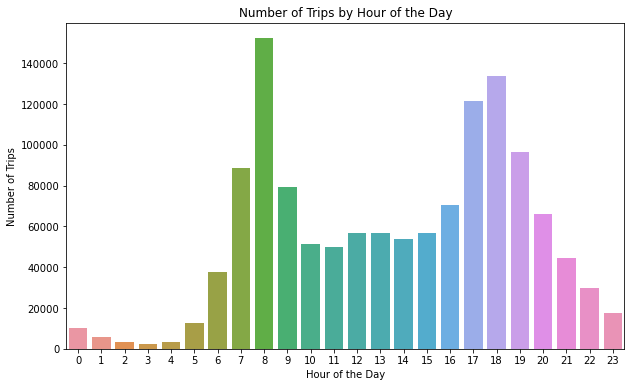

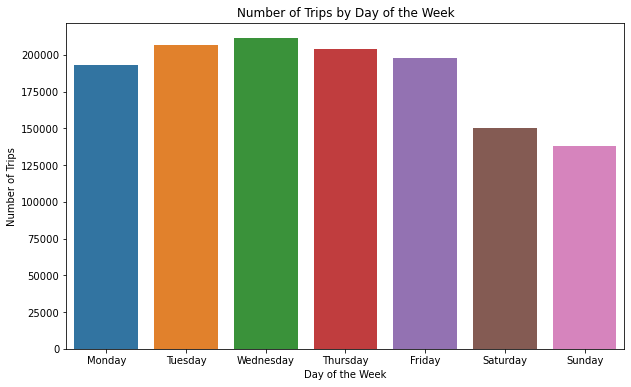

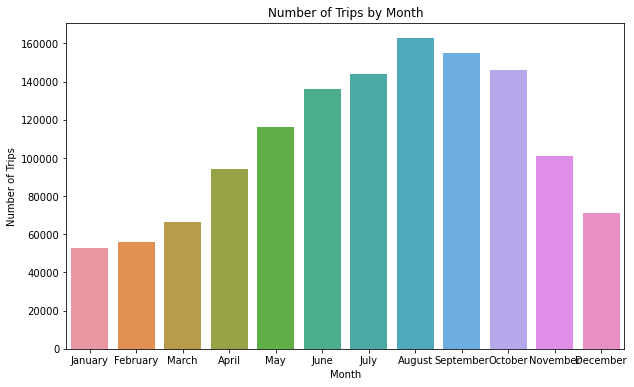

In [3]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

data['day_of_week'] = data['starttime'].dt.day_name()
data['hour_of_day'] = data['starttime'].dt.hour
data['month'] = data['starttime'].dt.month_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='hour_of_day', data=data)
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

# Plot for Trips by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.savefig('graphs/monthofyear.jpg')

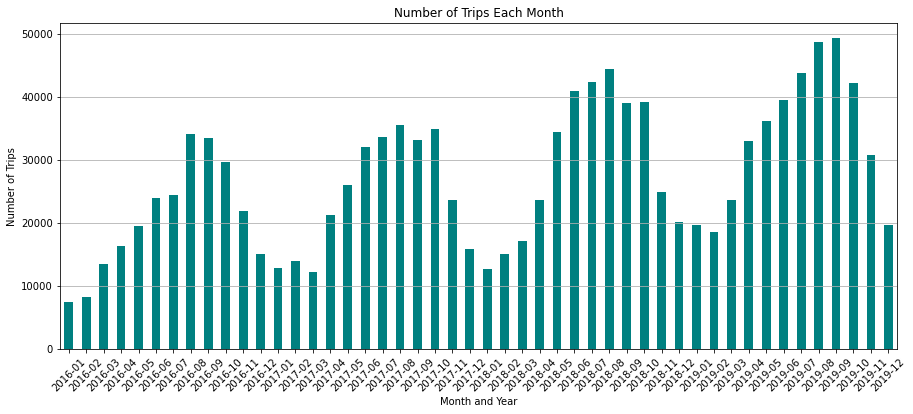

In [4]:
data['start_year_month'] = data['starttime'].dt.to_period('M')

# Count the number of trips in each month
monthly_trip_counts = data.groupby('start_year_month').size()
plt.figure(figsize=(15, 6))
monthly_trip_counts.plot(kind='bar', color='teal')
plt.title('Number of Trips Each Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Gender

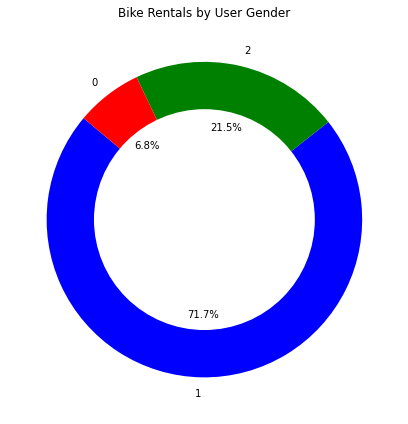

In [5]:
user_type_data = data['gender'].value_counts()

plt.figure(figsize=(10, 6))

plt.pie(user_type_data, labels=user_type_data.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red'])


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Bike Rentals by User Gender')

plt.tight_layout()
plt.show()

## Gender Day of Week

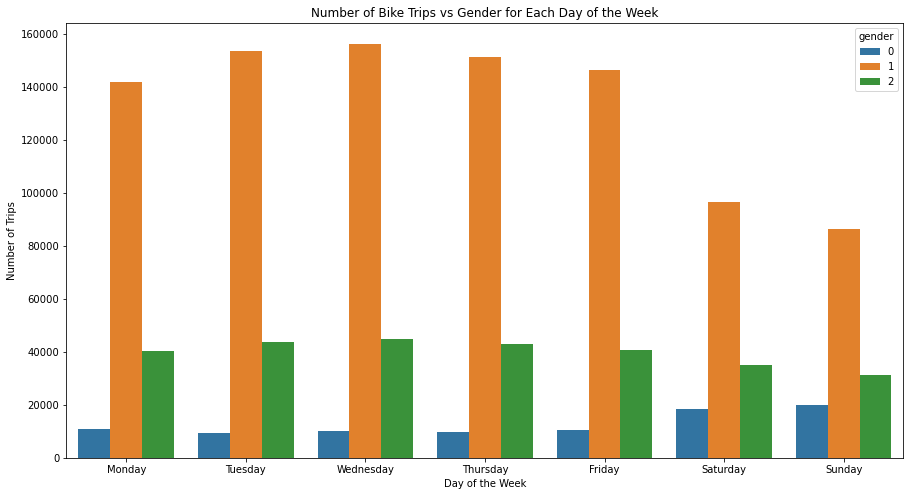

In [6]:
data['day_of_week'] = data['starttime'].dt.dayofweek

# Grouping by day of the week and gender to count the number of trips
daily_trips_gender = data.groupby(['day_of_week', 'gender']).size().reset_index(name='trip_count')

# Visualizing the number of bike trips vs gender for each day of the week
plt.figure(figsize=(15, 8))
sns.barplot(x='day_of_week', y='trip_count', hue='gender', data=daily_trips_gender)
plt.title('Number of Bike Trips vs Gender for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

## Gender Hour of Day

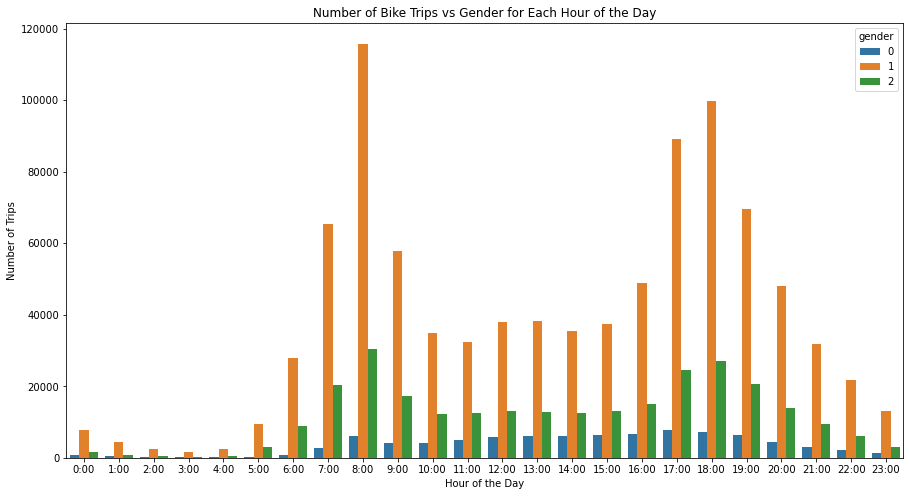

In [7]:
# Converting 'starttime' to datetime format and extracting the hour of the day

data['hour_of_day'] = data['starttime'].dt.hour

# Grouping by hour of the day and gender to count the number of trips
hourly_trips_gender = data.groupby(['hour_of_day', 'gender']).size().reset_index(name='trip_count')

# Visualizing the number of bike trips vs gender for each hour of the day
plt.figure(figsize=(15, 8))
sns.barplot(x='hour_of_day', y='trip_count', hue='gender', data=hourly_trips_gender)
plt.title('Number of Bike Trips vs Gender for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(24), labels=[f"{hour}:00" for hour in range(24)])
plt.show()

## Gender Month of Year

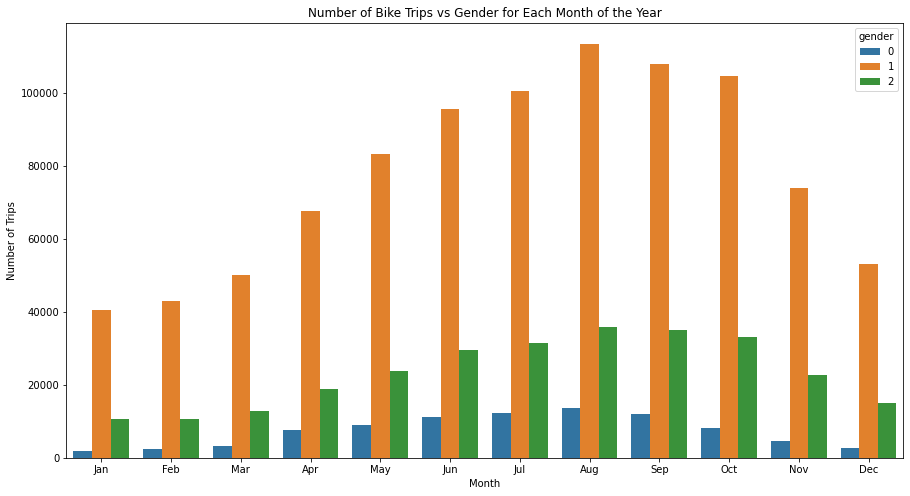

In [8]:
data['month'] = data['starttime'].dt.month

# Grouping by month and gender to count the number of trips
monthly_trips_gender = data.groupby(['month', 'gender']).size().reset_index(name='trip_count')

# Visualizing the number of bike trips vs gender for each month of the year
plt.figure(figsize=(15, 8))
sns.barplot(x='month', y='trip_count', hue='gender', data=monthly_trips_gender)
plt.title('Number of Bike Trips vs Gender for Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## User Type

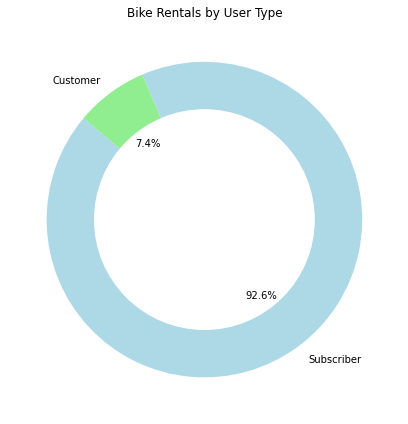

In [9]:
user_type_data = data['usertype'].value_counts()

plt.figure(figsize=(10, 6))

plt.pie(user_type_data, labels=user_type_data.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Bike Rentals by User Type')

plt.tight_layout()
plt.show()

## User Hour of Day

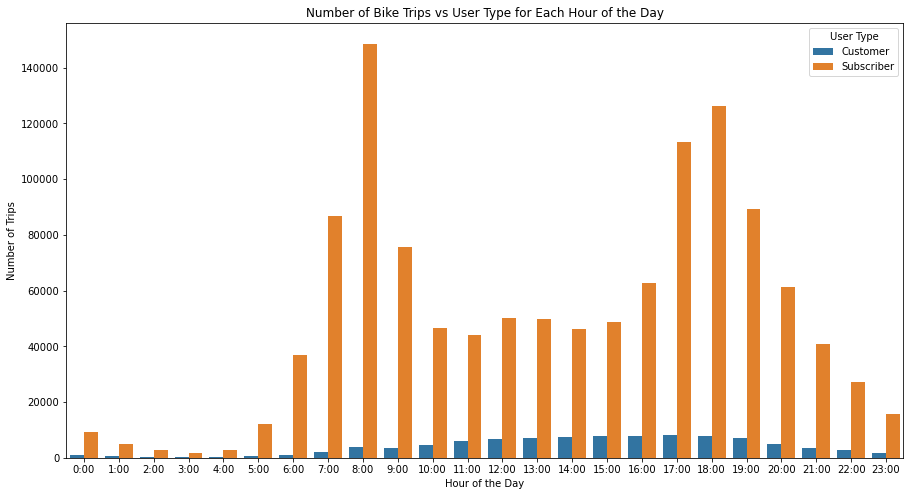

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data['hour_of_day'] = data['starttime'].dt.hour

# Grouping by hour of the day and user type to count the number of trips
hourly_trips = data.groupby(['hour_of_day', 'usertype']).size().reset_index(name='trip_count')

# Visualizing the number of bike trips vs user type for each hour of the day
plt.figure(figsize=(15, 8))
sns.barplot(x='hour_of_day', y='trip_count', hue='usertype', data=hourly_trips)
plt.title('Number of Bike Trips vs User Type for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.xticks(ticks=range(24), labels=[f"{hour}:00" for hour in range(24)])
plt.show()


## User Day of Week

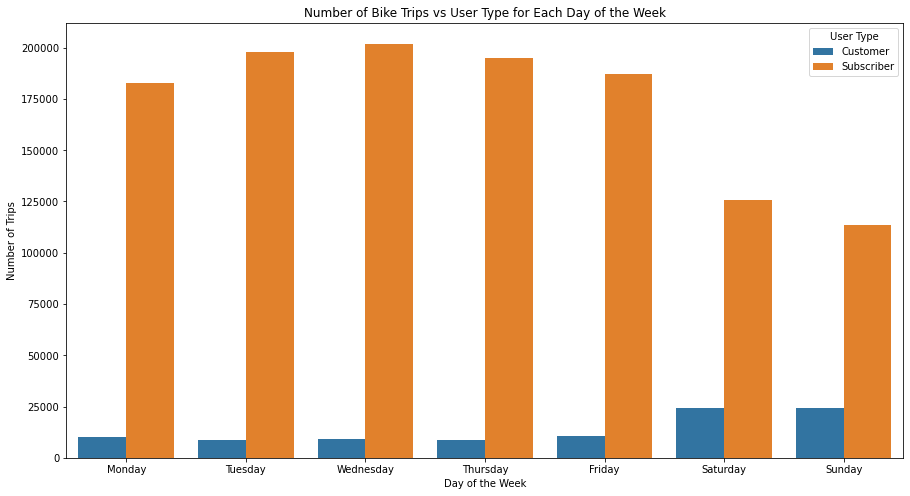

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data['day_of_week'] = data['starttime'].dt.dayofweek

# Grouping by day of the week and user type to count the number of trips
daily_trips = data.groupby(['day_of_week', 'usertype']).size().reset_index(name='trip_count')

# Visualizing the number of bike trips vs user type for each day of the week
plt.figure(figsize=(15, 8))
sns.barplot(x='day_of_week', y='trip_count', hue='usertype', data=daily_trips)
plt.title('Number of Bike Trips vs User Type for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


## User Month of Year

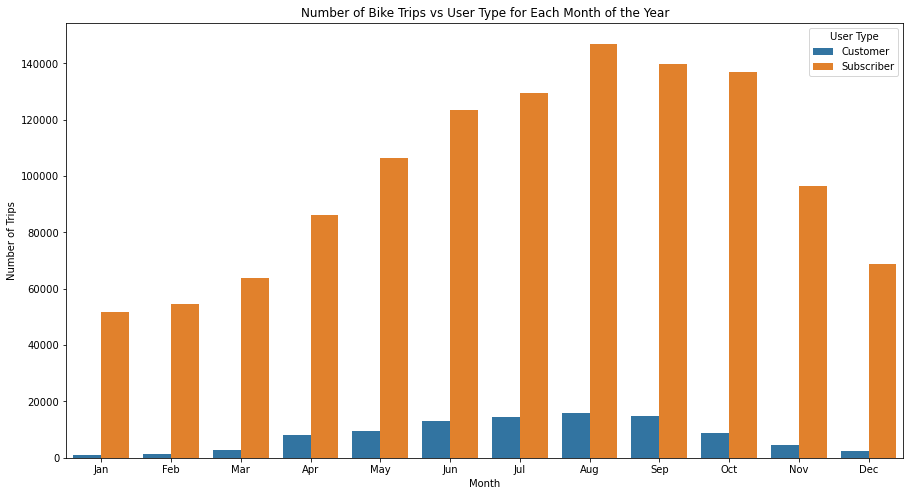

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['month'] = data['starttime'].dt.month

# Grouping by month and user type to count the number of trips
monthly_trips = data.groupby(['month', 'usertype']).size().reset_index(name='trip_count')

# Visualizing the number of bike trips vs user type for each month of the year
plt.figure(figsize=(15, 8))
sns.barplot(x='month', y='trip_count', hue='usertype', data=monthly_trips)
plt.title('Number of Bike Trips vs User Type for Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
